In [1]:
import mglearn
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

In [2]:
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [3]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


요구사항이 추가되었습니다. <br/>
품종을 제외한 4개의 열을 2차원으로 차원 축소 후,산점도 그래프를 두개 그리세요. <br/>
첫번째 산점도 그래프는  품종별로 다른 색으로 표현,<br/>
두번째 산점도 그래프는  KMeans  로 3개 클러스터로  클러스터링한 결과를 다른 색으로 표현 

# 차원축소

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_part = iris.loc[:,('SepalLength', 'SepalWidth', 'PetalWidth', 'PetalLength')]
scaler.fit(iris_part)
scaled_iris = scaler.transform(iris_part)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_iris)
iris_pca = pca.transform(scaled_iris)
print(scaled_iris.shape)
print(iris_pca.shape)

(150, 4)
(150, 2)


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


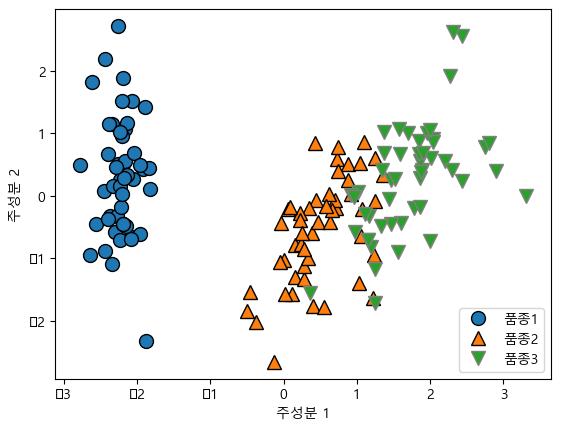

In [6]:
import mglearn
import matplotlib.pyplot as plt

mglearn.discrete_scatter(iris_pca[:,0], iris_pca[:,1], iris['Name'])
plt.legend(['품종1','품종2','품종3'], loc = 'best')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


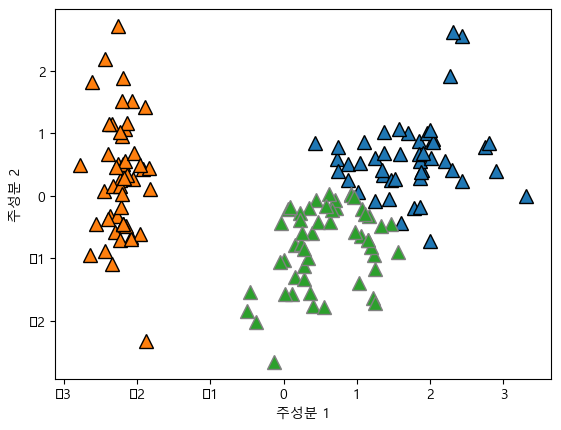

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_iris)

mglearn.discrete_scatter(iris_pca[:,0], iris_pca[:,1], kmeans.labels_, markers='^')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.show()